In [1]:
%reset 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from matplotlib import cm
import matplotlib.patches as patches
import pylab
from scipy.optimize import fsolve

%run ./DataGenerationScripts/load_default_parameters.ipynb # loading model parameters
%run ./DataGenerationScripts/set_size.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/aux_state_space.ipynb # loading auxiliarry functions for state space vizualization
%run ./DataGenerationScripts/load_animal_model_data.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/dIBDRdt_functions.ipynb # loading function for Seizure Rate calculation

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
font = {'size'   : 8}
# plt.rc('font', family='sans-serif') 
# plt.rc('font', serif='Helvetica Neue')
plt.rc('font',**{'family':'sans-serif','serif':['Helvetica Neue']})
plt.rc('font', **font)
plt.rc('text', usetex=True)

viridis = cm.get_cmap('viridis', 12)
color_scheme_3examples = [viridis(0.05)[0:3],viridis(0.5)[0:3],viridis(0.9)[0:3]]
alpha_value=0.45
size_scaler = 2.5
marker_sizer=2.5
alp=0.1 # alpha value for transparent lines N=30

h=2.8*0.393701 #[cm] to  modification [inch] Height of output figure
w=2.8*0.393701 #[cm] to  modification [inch] Width of output figure
margin=0.4 # [1] margin ratio of output figure layout
size_scaler=2.5

In [3]:
D_vis_vect=[0,0.35]

# Fig S10A

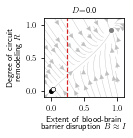

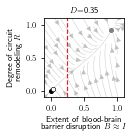

In [4]:
 # In this cell we define simulation-specific parameters of simulation 
        # duration; external input parameters; number of simulation; output location for data  
params=load_default_parameters('rate')

params['k_DR']=0.0001

locals().update(params)

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]

    B_max = 1.1
    R_max = 1.1
    B_min = -0.1
    R_min = -0.1

    R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]

    FP=[];
    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

#     velocity = np.sqrt(U*U + V*V)                
    FP=fixedpointsfinder(fun_dbdt,-0.1,1,100000) # Here we will check for steady states on given interval with given discritization step

    
    pylab.ion()
    fig0= plt.figure()
    ax0 = fig0.add_subplot(1, 1, 1)
    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.5,1.5])

    for cc in range(len(FP)):
        if FP[cc][0]>=Theta:
            col='grey'
        else:
            col='black' 

        mrksize = 10
        if FP[cc][1]=='Unstable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Semistable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Stable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)

    threshold_position = Theta/k_BI
    plt.plot([threshold_position, threshold_position],[R_min,R_max],'--',color='tab:red',linewidth = 3.0/marker_sizer)


    plt.xlabel("Extent of blood-brain \n" 
               r"barrier disruption $B \approx I$")
    plt.ylabel("Degree of circuit \n"
               r"remodeling $R$")
    plt.title('$D$='+str(np.round(D_const*100)/100),fontsize=font['size'])

    ax0.set_xlim([B_min,B_max])
    ax0.set_ylim([R_min,R_max])

    plt.gcf().subplots_adjust(bottom=margin)
    plt.gcf().subplots_adjust(left=margin)
    set_size(1.0*w,1.0*w)
    if ii==0:
        fig0.savefig('./Figures/Supplementary/Fig_S10A_left.pdf')  
    if ii==1:
        fig0.savefig('./Figures/Supplementary/Fig_S10A_right.pdf')  

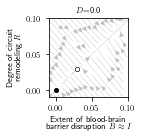

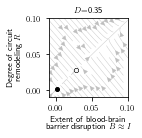

In [5]:
locals().update(params)

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]

    B_max = 0.1
    R_max = 0.1
    B_min = -0.01
    R_min = -0.01

    R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]

    FP=[];
    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

#     velocity = np.sqrt(U*U + V*V)                
    FP=fixedpointsfinder(fun_dbdt,-0.1,1,100000) # Here we will check for steady states on given interval with given discritization step

    
    pylab.ion()
    fig0= plt.figure()
    ax0 = fig0.add_subplot(1, 1, 1)
    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.5,1.5])

    for cc in range(len(FP)):
        if FP[cc][0]>=Theta:
            col='grey'
        else:
            col='black' 

        mrksize = 10
        if FP[cc][1]=='Unstable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Semistable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Stable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)

    threshold_position = Theta/k_BI
    plt.plot([threshold_position, threshold_position],[R_min,R_max],'--',color='tab:red',linewidth = 3.0/marker_sizer)


    plt.xlabel("Extent of blood-brain \n" 
               r"barrier disruption $B \approx I$")
    plt.ylabel("Degree of circuit \n"
               r"remodeling $R$")
    plt.title('$D$='+str(np.round(D_const*100)/100),fontsize=font['size'])

    ax0.set_xlim([B_min,B_max])
    ax0.set_ylim([R_min,R_max])

    plt.gcf().subplots_adjust(bottom=margin)
    plt.gcf().subplots_adjust(left=margin)
    set_size(1.0*w,1.0*w)
    if ii==0:
        fig0.savefig('./Figures/Supplementary/Fig_S10A_left_inset.pdf')  
    if ii==1:
        fig0.savefig('./Figures/Supplementary/Fig_S10A_right_inset.pdf')  

# Fig S10B

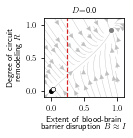

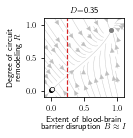

In [6]:
 # In this cell we define simulation-specific parameters of simulation 
        # duration; external input parameters; number of simulation; output location for data  
params=load_default_parameters('rate')

params['k_DR']=0.0005

locals().update(params)

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]

    B_max = 1.1
    R_max = 1.1
    B_min = -0.1
    R_min = -0.1

    R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]

    FP=[];
    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

#     velocity = np.sqrt(U*U + V*V)                
    FP=fixedpointsfinder(fun_dbdt,-0.1,1,100000) # Here we will check for steady states on given interval with given discritization step

    
    pylab.ion()
    fig0= plt.figure()
    ax0 = fig0.add_subplot(1, 1, 1)
    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.5,1.5])

    for cc in range(len(FP)):
        if FP[cc][0]>=Theta:
            col='grey'
        else:
            col='black' 

        mrksize = 10
        if FP[cc][1]=='Unstable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Semistable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Stable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)

    threshold_position = Theta/k_BI
    plt.plot([threshold_position, threshold_position],[R_min,R_max],'--',color='tab:red',linewidth = 3.0/marker_sizer)


    plt.xlabel("Extent of blood-brain \n" 
               r"barrier disruption $B \approx I$")
    plt.ylabel("Degree of circuit \n"
               r"remodeling $R$")
    plt.title('$D$='+str(np.round(D_const*100)/100),fontsize=font['size'])

    ax0.set_xlim([B_min,B_max])
    ax0.set_ylim([R_min,R_max])

    plt.gcf().subplots_adjust(bottom=margin)
    plt.gcf().subplots_adjust(left=margin)
    set_size(1.0*w,1.0*w)
    if ii==0:
        fig0.savefig('./Figures/Supplementary/Fig_S10B_left.pdf')  
    if ii==1:
        fig0.savefig('./Figures/Supplementary/Fig_S10B_right.pdf')  

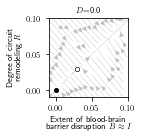

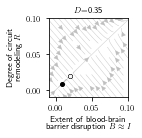

In [7]:
locals().update(params)

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]

    B_max = 0.1
    R_max = 0.1
    B_min = -0.01
    R_min = -0.01

    R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]

    FP=[];
    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

#     velocity = np.sqrt(U*U + V*V)                
    FP=fixedpointsfinder(fun_dbdt,-0.1,1,100000) # Here we will check for steady states on given interval with given discritization step

    
    pylab.ion()
    fig0= plt.figure()
    ax0 = fig0.add_subplot(1, 1, 1)
    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.5,1.5])

    for cc in range(len(FP)):
        if FP[cc][0]>=Theta:
            col='grey'
        else:
            col='black' 

        mrksize = 10
        if FP[cc][1]=='Unstable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Semistable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Stable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)

    threshold_position = Theta/k_BI
    plt.plot([threshold_position, threshold_position],[R_min,R_max],'--',color='tab:red',linewidth = 3.0/marker_sizer)


    plt.xlabel("Extent of blood-brain \n" 
               r"barrier disruption $B \approx I$")
    plt.ylabel("Degree of circuit \n"
               r"remodeling $R$")
    plt.title('$D$='+str(np.round(D_const*100)/100),fontsize=font['size'])

    ax0.set_xlim([B_min,B_max])
    ax0.set_ylim([R_min,R_max])

    plt.gcf().subplots_adjust(bottom=margin)
    plt.gcf().subplots_adjust(left=margin)
    set_size(1.0*w,1.0*w)
    if ii==0:
        fig0.savefig('./Figures/Supplementary/Fig_S10B_left_inset.pdf')  
    if ii==1:
        fig0.savefig('./Figures/Supplementary/Fig_S10B_right_inset.pdf') 

# Fig S10C

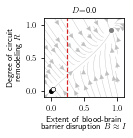

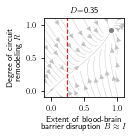

In [8]:
 # In this cell we define simulation-specific parameters of simulation 
        # duration; external input parameters; number of simulation; output location for data  
params=load_default_parameters('rate')

params['k_DR']=0.001

locals().update(params)

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]

    B_max = 1.1
    R_max = 1.1
    B_min = -0.1
    R_min = -0.1

    R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]

    FP=[];
    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

#     velocity = np.sqrt(U*U + V*V)                
    FP=fixedpointsfinder(fun_dbdt,-0.1,1,100000) # Here we will check for steady states on given interval with given discritization step

    
    pylab.ion()
    fig0= plt.figure()
    ax0 = fig0.add_subplot(1, 1, 1)
    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.5,1.5])

    for cc in range(len(FP)):
        if FP[cc][0]>=Theta:
            col='grey'
        else:
            col='black' 

        mrksize = 10
        if FP[cc][1]=='Unstable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Semistable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Stable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)

    threshold_position = Theta/k_BI
    plt.plot([threshold_position, threshold_position],[R_min,R_max],'--',color='tab:red',linewidth = 3.0/marker_sizer)


    plt.xlabel("Extent of blood-brain \n" 
               r"barrier disruption $B \approx I$")
    plt.ylabel("Degree of circuit \n"
               r"remodeling $R$")
    plt.title('$D$='+str(np.round(D_const*100)/100),fontsize=font['size'])

    ax0.set_xlim([B_min,B_max])
    ax0.set_ylim([R_min,R_max])

    plt.gcf().subplots_adjust(bottom=margin)
    plt.gcf().subplots_adjust(left=margin)
    set_size(1.0*w,1.0*w)
    if ii==0:
        fig0.savefig('./Figures/Supplementary/Fig_S10C_left.pdf')  
    if ii==1:
        fig0.savefig('./Figures/Supplementary/Fig_S10C_right.pdf') 

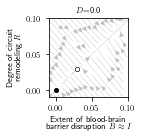

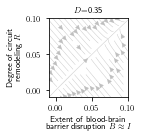

In [9]:
locals().update(params)

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]

    B_max = 0.1
    R_max = 0.1
    B_min = -0.01
    R_min = -0.01

    R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]

    FP=[];
    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

#     velocity = np.sqrt(U*U + V*V)                
    FP=fixedpointsfinder(fun_dbdt,-0.1,1,100000) # Here we will check for steady states on given interval with given discritization step

    
    pylab.ion()
    fig0= plt.figure()
    ax0 = fig0.add_subplot(1, 1, 1)
    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.5,1.5])

    for cc in range(len(FP)):
        if FP[cc][0]>=Theta:
            col='grey'
        else:
            col='black' 

        mrksize = 10
        if FP[cc][1]=='Unstable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Semistable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Stable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)

    threshold_position = Theta/k_BI
    plt.plot([threshold_position, threshold_position],[R_min,R_max],'--',color='tab:red',linewidth = 3.0/marker_sizer)


    plt.xlabel("Extent of blood-brain \n" 
               r"barrier disruption $B \approx I$")
    plt.ylabel("Degree of circuit \n"
               r"remodeling $R$")
    plt.title('$D$='+str(np.round(D_const*100)/100),fontsize=font['size'])

    ax0.set_xlim([B_min,B_max])
    ax0.set_ylim([R_min,R_max])

    plt.gcf().subplots_adjust(bottom=margin)
    plt.gcf().subplots_adjust(left=margin)
    set_size(1.0*w,1.0*w)
    if ii==0:
        fig0.savefig('./Figures/Supplementary/Fig_S10C_left_inset.pdf')  
    if ii==1:
        fig0.savefig('./Figures/Supplementary/Fig_S10C_right_inset.pdf')  